In [1]:
import cv2
import numpy as np
import os
from PIL import Image
from matplotlib import pyplot as plt
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_palm")
    os.makedirs("data/train/02_fist")
    os.makedirs("data/train/03_thumbs-up")
    os.makedirs("data/train/04_thumbs-down")
    os.makedirs("data/train/05_index-right")
    os.makedirs("data/train/06_index-left")
    os.makedirs("data/train/07_no-gesture")
    os.makedirs("data/test")
    os.makedirs("data/test/01_palm")
    os.makedirs("data/test/02_fist")
    os.makedirs("data/test/03_thumbs-up")
    os.makedirs("data/test/04_thumbs-down")
    os.makedirs("data/test/05_index-right")
    os.makedirs("data/test/06_index-left")
    os.makedirs("data/test/07_no-gesture")

In [3]:
os.listdir('data')

['test', 'train']

In [4]:
os.listdir('data/train')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [5]:
os.listdir('data/test')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [6]:
print('Enter mode:')
mode = input()

Enter mode:


KeyboardInterrupt: Interrupted by user

In [6]:
if mode == 'train':   
    directory = 'data/'+mode+'/'
else:
    directory = 'data/'+mode+'/'

NameError: name 'mode' is not defined

In [ ]:
cap = cv2.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv2.flip(frame, 1)

    # Getting count of existing images
    count = {'palm': len(os.listdir(directory+"/01_palm")),
             'fist': len(os.listdir(directory+"/02_fist")),
             'thumbs-up': len(os.listdir(directory+"/03_thumbs-up")),
             'thumbs-down': len(os.listdir(directory+"/04_thumbs-down")),
             'index-right': len(os.listdir(directory+"/05_index-right")),
             'index-left': len(os.listdir(directory+"/06_index-left")),
             'no-gesture': len(os.listdir(directory+"/07_no-gesture")),
            }
    # Printing the count in each set to the screen
    cv2.putText(frame, "MODE: "+mode, (10, 50),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "IMAGE COUNT:", (10, 100), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Hand(0):"+str(count['palm']), (10, 150), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Raised Fist(1):"+str(count['fist']), (10, 200), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Up(2):"+str(count['thumbs-up']), (10, 250), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Thumbs-Down(3):"+str(count['thumbs-down']), (10, 300), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Right (4):"+str(count['index-right']), (10, 350), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "Index Pointing Left(5):"+str(count['index-left']), (10, 400), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv2.putText(frame, "No gesture(6):"+str(count['no-gesture']), (10, 450), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv2.resize(roi, (120, 120))

    cv2.imshow("Collecting data", frame)

    # do the processing after capturing the image!
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
    cv2.imshow("ROI", roi)

    interrupt = cv2.waitKey(10)
    
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv2.imwrite(directory+'01_palm/'+str(count['palm'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv2.imwrite(directory+'02_fist/'+str(count['fist'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv2.imwrite(directory+'03_thumbs-up/'+str(count['thumbs-up'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv2.imwrite(directory+'04_thumbs-down/'+str(count['thumbs-down'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv2.imwrite(directory+'05_index-right/'+str(count['index-right'])+'.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv2.imwrite(directory+'06_index-left/'+str(count['index-left'])+'.jpg', roi)
    if interrupt & 0xFF == ord('6'):
        cv2.imwrite(directory+'07_no-gesture/'+str(count['no-gesture'])+'.jpg', roi)



cap.release()
cv2.destroyAllWindows()

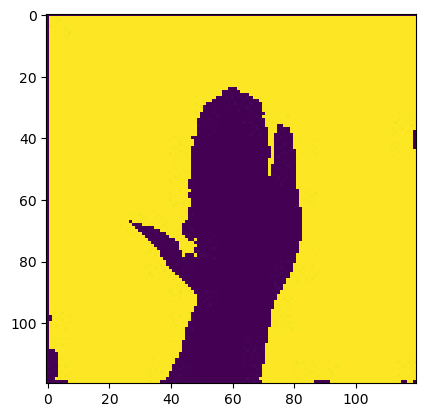

In [7]:
img = Image.open('data\\train\\01_palm\\90.jpg')
plt.imshow(img)

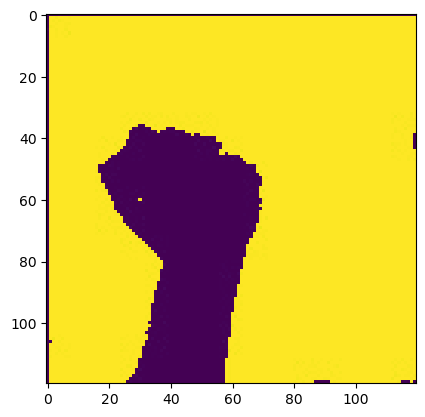

In [8]:
img = Image.open('data\\train\\02_fist\\0.jpg')
plt.imshow(img)

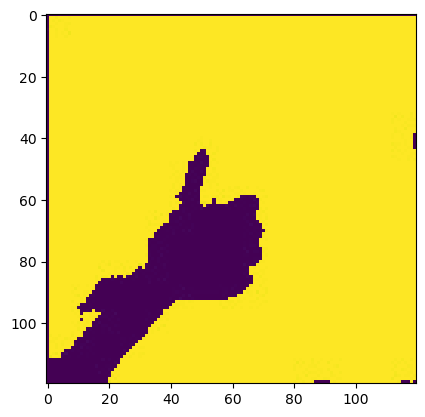

In [9]:
img = Image.open('data\\train\\03_thumbs-up\\4.jpg')
plt.imshow(img)

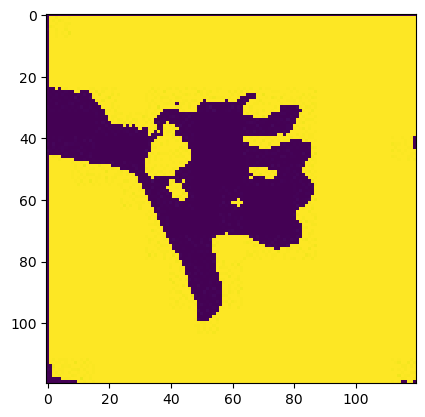

In [10]:
img = Image.open('data\\train\\04_thumbs-down\\15.jpg')
plt.imshow(img)

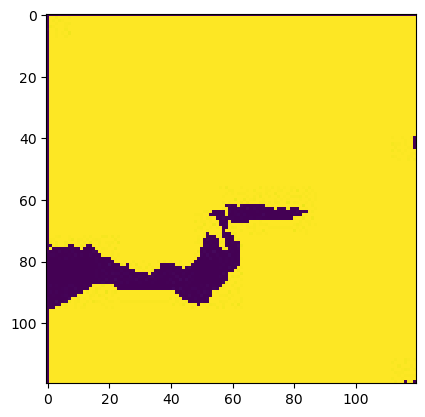

In [11]:
img = Image.open('data\\train\\05_index-right\\15.jpg')
plt.imshow(img)

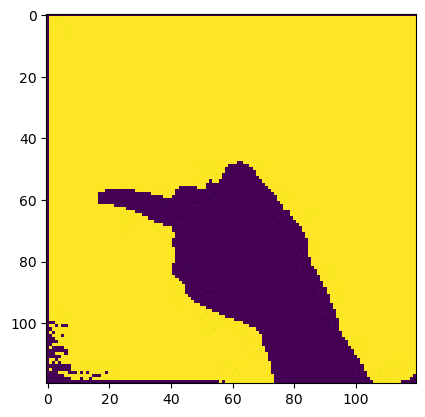

In [12]:
img = Image.open('data\\train\\06_index-left\\7.jpg')
plt.imshow(img)

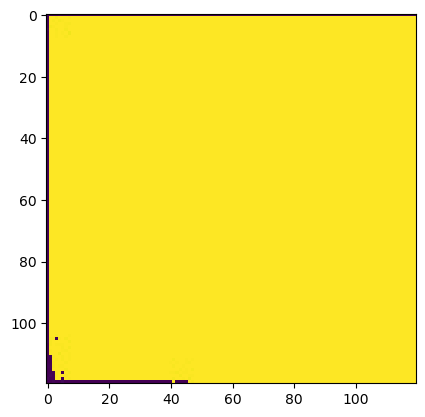

In [13]:
img = Image.open('data\\train\\07_no-gesture\\15.jpg')
plt.imshow(img)

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader



In [14]:
# Data Transformation
transform_train = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((120, 120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_test = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((120, 120)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [15]:
train_dataset = ImageFolder(root='data/train', transform=transform_train)
test_dataset = ImageFolder(root='data/test', transform=transform_test)


In [16]:
# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [17]:

# Print class names and mapping
print("Class names:", train_dataset.classes)
print("Class mapping:", train_dataset.class_to_idx)

Class names: ['01_palm', '02_fist', '03_thumbs-up', '04_thumbs-down', '05_index-right', '06_index-left', '07_no-gesture']
Class mapping: {'01_palm': 0, '02_fist': 1, '03_thumbs-up': 2, '04_thumbs-down': 3, '05_index-right': 4, '06_index-left': 5, '07_no-gesture': 6}


In [18]:
import torch.nn as nn
import torch.nn.functional as F




In [18]:
class GestureRecognitionCNN(nn.Module):
    def __init__(self):
        super(GestureRecognitionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Create an instance of the model
model = GestureRecognitionCNN()
print(model)

GestureRecognitionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12544, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [20]:
import torch.optim as optim



In [19]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)  # Decrease LR by 0.1 every 5 epochs

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=20):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")




In [20]:
# Train the model
train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=20)


Epoch [1/20], Loss: 1.0288
Epoch [2/20], Loss: 0.1838
Epoch [3/20], Loss: 0.0974
Epoch [4/20], Loss: 0.0454
Epoch [5/20], Loss: 0.0554
Epoch [6/20], Loss: 0.0276
Epoch [7/20], Loss: 0.0101
Epoch [8/20], Loss: 0.0155
Epoch [9/20], Loss: 0.0147
Epoch [10/20], Loss: 0.0289
Epoch [11/20], Loss: 0.0111
Epoch [12/20], Loss: 0.0142
Epoch [13/20], Loss: 0.0073
Epoch [14/20], Loss: 0.0093
Epoch [15/20], Loss: 0.0091
Epoch [16/20], Loss: 0.0110
Epoch [17/20], Loss: 0.0031
Epoch [18/20], Loss: 0.0123
Epoch [19/20], Loss: 0.0118
Epoch [20/20], Loss: 0.0093


In [21]:
import torch
import os

best_accuracy = 0.0

def train_model_with_early_stopping(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20):
    global best_accuracy
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        scheduler.step()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")
        
        accuracy = evaluate_model(model, test_loader)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), 'best_model.pth')

def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy: {accuracy}%")
    return accuracy

In [22]:
train_model_with_early_stopping(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20)



Epoch [1/20], Loss: 0.0116
Accuracy: 66.9047619047619%
Epoch [2/20], Loss: 0.0020
Accuracy: 66.9047619047619%
Epoch [3/20], Loss: 0.0021
Accuracy: 66.9047619047619%
Epoch [4/20], Loss: 0.0011
Accuracy: 66.9047619047619%
Epoch [5/20], Loss: 0.0045
Accuracy: 66.9047619047619%
Epoch [6/20], Loss: 0.0023
Accuracy: 66.9047619047619%
Epoch [7/20], Loss: 0.0008
Accuracy: 66.9047619047619%
Epoch [8/20], Loss: 0.0013
Accuracy: 66.9047619047619%
Epoch [9/20], Loss: 0.0040
Accuracy: 66.9047619047619%
Epoch [10/20], Loss: 0.0009
Accuracy: 66.9047619047619%
Epoch [11/20], Loss: 0.0011
Accuracy: 66.9047619047619%
Epoch [12/20], Loss: 0.0029
Accuracy: 66.9047619047619%
Epoch [13/20], Loss: 0.0015
Accuracy: 66.9047619047619%
Epoch [14/20], Loss: 0.0029
Accuracy: 66.9047619047619%
Epoch [15/20], Loss: 0.0008
Accuracy: 66.9047619047619%
Epoch [16/20], Loss: 0.0013
Accuracy: 66.9047619047619%
Epoch [17/20], Loss: 0.0046
Accuracy: 66.9047619047619%
Epoch [18/20], Loss: 0.0015
Accuracy: 66.9047619047619%
E

In [23]:
# Evaluate the Model
evaluate_model(model, test_loader)

Accuracy: 66.9047619047619%


66.9047619047619

In [25]:
# Save the model architecture and weights
torch.save(model.state_dict(), 'gesture-model.pth')


In [29]:
import matplotlib.pyplot as plt

def train_model_with_early_stopping(model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20):
    global best_accuracy
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        valid_loss, valid_accuracy = evaluate_model(model, test_loader, criterion)
        valid_losses.append(valid_loss)
        valid_accuracies.append(valid_accuracy)

        print(f"Epoch [{epoch + 1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Validation Loss: {valid_loss:.4f}, Validation Accuracy: {valid_accuracy:.2f}%")
        
        if valid_accuracy > best_accuracy:
            best_accuracy = valid_accuracy
            torch.save(model.state_dict(), 'best_model.pth')
        
        scheduler.step()
    
    return train_losses, valid_losses, train_accuracies, valid_accuracies

def evaluate_model(model, test_loader, criterion):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    return running_loss / len(test_loader), accuracy

# Train and get metrics
train_losses, valid_losses, train_accuracies, valid_accuracies = train_model_with_early_stopping(
    model, train_loader, test_loader, criterion, optimizer, scheduler, num_epochs=20
)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch [1/20], Train Loss: 0.0132, Train Accuracy: 99.71%, Validation Loss: 2.6288, Validation Accuracy: 66.90%


KeyboardInterrupt: 

In [28]:
import cv2
import pyautogui
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Define the model class (must match the architecture of the saved model)
class GestureRecognitionCNN(nn.Module):
    def __init__(self):
        super(GestureRecognitionCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 7)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, 256 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Load the trained model
model = GestureRecognitionCNN()
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Define transformations for test image
transform_test = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((120, 120)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Initialize video capture
vid = cv2.VideoCapture(0)

# Start capturing frames
while (vid.isOpened()):
    ret, frame = vid.read()

    if ret:
        frame = cv2.flip(frame, 1)
        x1, y1, x2, y2 = int(0.5 * frame.shape[1]), 10, frame.shape[1] - 10, int(0.5 * frame.shape[1])
        cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255, 0, 0), 3)
        roi = frame[y1:y2, x1:x2]
        roi = cv2.resize(roi, (120, 120))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, roi = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
        test_image = transform_test(Image.fromarray(roi))
        test_image = test_image.unsqueeze(0)

        # Make prediction
        with torch.no_grad():
            outputs = model(test_image)
            _, predicted = torch.max(outputs.data, 1)
            predicted_gesture = predicted.item()

        # Dictionary to map predictions to actions
        actions = {
            0: 'palm',
            1: 'fist',
            2: 'thumbs-up',
            3: 'thumbs-down',
            4: 'index-right',
            5: 'index-left',
            6: 'no-gesture'
        }

        predicted_gesture_name = actions[predicted_gesture]

        # Perform action based on predicted gesture
        if predicted_gesture_name == 'palm':
            pyautogui.press('playpause', presses=1)
        elif predicted_gesture_name == 'fist':
            pyautogui.press('volumemute', presses=1)
        elif predicted_gesture_name == 'thumbs-up':
            pyautogui.press('volumeup', presses=1)
        elif predicted_gesture_name == 'thumbs-down':
            pyautogui.press('volumedown', presses=1)
        elif predicted_gesture_name == 'index-right':
            for _ in range(10):
                pyautogui.press('right')
        elif predicted_gesture_name == 'index-left':
            for _ in range(10):
                pyautogui.press('left')

        cv2.putText(frame, "Gesture: {}".format(predicted_gesture_name), (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)
        cv2.putText(frame, "Action: {}".format(predicted_gesture_name), (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)

        cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

vid.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

# Ignore below code for now


In [1]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Step 1 - Building the CNN

# Initializing the CNN
model = Sequential()

# First convolution layer and pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
model.add(MaxPooling2D((2, 2)))
# Flattening the layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [4]:
# Compiling the CNN
model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing. 

In [9]:




train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 700 images belonging to 7 classes.
Found 420 images belonging to 7 classes.


In [5]:
batch_size = 32



# Define your ImageDataGenerator with the updated batch_size
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=batch_size,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=batch_size,
                                            color_mode='grayscale',
                                            class_mode='categorical')

# Calculate steps_per_epoch and validation_steps based on the new batch size
steps_per_epoch = training_set.samples // batch_size
validation_steps = test_set.samples // batch_size




Found 700 images belonging to 7 classes.
Found 420 images belonging to 7 classes.


In [6]:
# Train the model with the updated parameters
history = model.fit(
    training_set,
    steps_per_epoch=steps_per_epoch,
    epochs=7,
    validation_data=test_set,
    validation_steps=validation_steps)

Epoch 1/7
21/21 [==============================] - 6s 263ms/step - loss: 0.9824 - accuracy: 0.7515 - val_loss: 3.2150 - val_accuracy: 0.5986
Epoch 2/7
21/21 [==============================] - 5s 254ms/step - loss: 0.0242 - accuracy: 0.9955 - val_loss: 3.1383 - val_accuracy: 0.6923
Epoch 3/7
21/21 [==============================] - 5s 258ms/step - loss: 0.0322 - accuracy: 0.9910 - val_loss: 2.6124 - val_accuracy: 0.6490
Epoch 4/7
21/21 [==============================] - 6s 274ms/step - loss: 0.0128 - accuracy: 0.9940 - val_loss: 3.0796 - val_accuracy: 0.6058
Epoch 5/7
21/21 [==============================] - 6s 273ms/step - loss: 0.0087 - accuracy: 0.9970 - val_loss: 4.4082 - val_accuracy: 0.6611
Epoch 6/7
21/21 [==============================] - 6s 301ms/step - loss: 0.0036 - accuracy: 0.9985 - val_loss: 5.3083 - val_accuracy: 0.5264
Epoch 7/7
21/21 [==============================] - 7s 319ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 4.7781 - val_accuracy: 0.6202


In [7]:
train_loss, train_acc = model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

22/22 [==============================] - 2s 87ms/step - loss: 2.0035e-04 - accuracy: 1.0000
Train accuracy: 100.00%


In [8]:
test_loss, test_acc = model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

14/14 [==============================] - 1s 58ms/step - loss: 4.7611 - accuracy: 0.6190
Test accuracy: 61.90%


In [24]:
model.save('handdummy_model')

AttributeError: 'GestureRecognitionCNN' object has no attribute 'save'

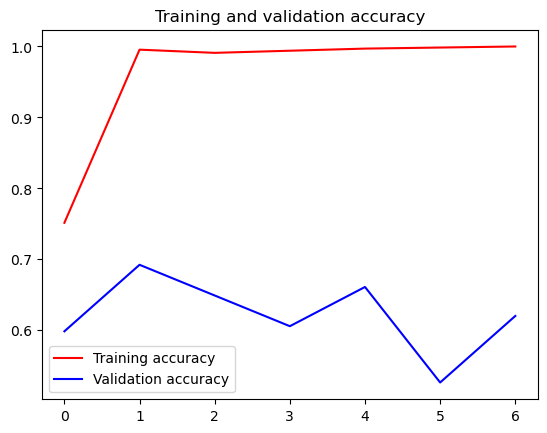

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()



plt.show()

<Figure size 640x480 with 0 Axes>

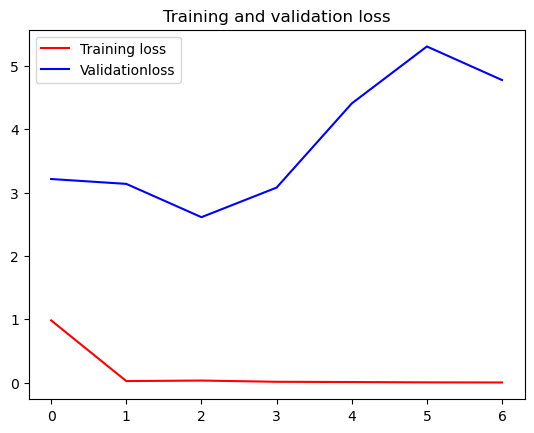

<Figure size 640x480 with 0 Axes>

In [11]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validationloss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

In [12]:
model_json = model.to_json()
with open("gesture-modeldummy.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('gesture-modeldummy.h5')

In [12]:
model_json = model.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights('gesture-model.h5')

In [13]:
 import numpy as np
from keras.models import model_from_json
import operator
import cv2
import sys, os
import pyautogui
import time

In [14]:
json_file = open("gesture-modeldummy.json", "r")
model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(model_json)
# load weights into new model
loaded_model.load_weights("gesture-modeldummy.h5")
print("Loaded model from disk")

Loaded model from disk


In [15]:
final_label = ""
action=""

In [ ]:
vid = cv2.VideoCapture(0)
while (vid.isOpened()):

    ret,frame = vid.read()
    if ret:
            frame = cv2.flip(frame, 1)

            # Got this from collect-data.py
            # Coordinates of the ROI
            x1 = int(0.5*frame.shape[1])
            y1 = 10
            x2 = frame.shape[1]-10
            y2 = int(0.5*frame.shape[1])
            # Drawing the ROI
            # The increment/decrement by 1 is to compensate for the bounding box
            cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
            # Extracting the ROI
            roi = frame[y1:y2, x1:x2]

            # Resizing the ROI so it can be fed to the model for prediction
            roi = cv2.resize(roi, (120, 120))
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow("Test Image", test_image)
            result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))
            prediction = {'palm': result[0][0],
                          'fist': result[0][1],
                          'thumbs-up': result[0][2],
                          'thumbs-down': result[0][3],
                          'index-right': result[0][4],
                          'index-left': result[0][5],
                          'no-gesture':result[0][6]}
                # Sorting based on top prediction
            prediction = sorted(prediction.items(), key=operator.itemgetter(1), reverse=True)

            if(prediction[0][0] == 'palm'):
                final_label = 'palm'
                action = "PLAY/PAUSE"
                pyautogui.press('playpause', presses=1)
            elif (prediction[0][0] == 'fist'):
                final_label = 'fist'
                action = "MUTE"
                pyautogui.press('volumemute', presses=1)
            elif (prediction[0][0] == 'thumbs-up'):
                final_label = "thumbs-up"
                action = "VOLUME UP"
                pyautogui.press('volumeup', presses=1)
            elif (prediction[0][0] == "thumbs-down"):
                final_label = "thumbs-down"
                action = "VOLUME DOWN"
                pyautogui.press('volumedown', presses=1)
            elif (prediction[0][0] == "index-right"):
                final_label = "index-right"
                action = "FORWARD"
                pyautogui.press('nexttrack', presses=1)
            elif (prediction[0][0] == "index-left"):
                final_label = "index-left"
                action = "REWIND"
                pyautogui.press('prevtrack', presses=1)
            elif (prediction[0][0] == "no-gesture"):
                final_label = "no-gesture"
                action = "NO-ACTION"
            text1= "Gesture: {}".format(final_label)
            text2= "Action:{}".format(action)

            cv2.putText(frame, text1 , (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.putText(frame, text2 , (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
            cv2.imshow("Hand Gesture Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step


In [17]:
# OpenCV is imported as cv2
import cv2
# Module to interact with keyboard and mouse
import pyautogui
# Module to perform operations on arrays
import numpy as np

# Load the trained model
# model = model('handdummy_model.hdf5')

# Initialize video capture
vid = cv2.VideoCapture(0)

# Start capturing frames
while (vid.isOpened()):
    # Read a frame from the video
    ret, frame = vid.read()

    # Check if frame is read correctly
    if ret:
        # Flip the frame horizontally for better visualization
        frame = cv2.flip(frame, 1)

        # Define ROI coordinates
        x1 = int(0.5 * frame.shape[1])
        y1 = 10
        x2 = frame.shape[1] - 10
        y2 = int(0.5 * frame.shape[1])

        # Draw a rectangle around the ROI
        cv2.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255, 0, 0), 3)

        # Extract ROI
        roi = frame[y1:y2, x1:x2]

        # Resize ROI for model prediction
        roi = cv2.resize(roi, (120, 120))
        roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, test_image = cv2.threshold(roi, 130, 255, cv2.THRESH_BINARY)

        # Reshape test image for prediction
        result = loaded_model.predict(test_image.reshape(1, 120, 120, 1))

        # Dictionary to map predictions to actions
        actions = {
            0: 'palm',
            1: 'fist',
            2: 'thumbs-up',
            3: 'thumbs-down',
            4: 'index-right',
            5: 'index-left',
            6: 'no-gesture'
        }

        # Predict the gesture
        predicted_gesture = actions[np.argmax(result)]

        # Perform action based on predicted gesture
        if predicted_gesture == 'palm':
            pyautogui.press('playpause', presses=1)
        elif predicted_gesture == 'fist':
            pyautogui.press('volumemute', presses=1)
        elif predicted_gesture == 'thumbs-up':
            pyautogui.press('volumeup', presses=1)
        elif predicted_gesture == 'thumbs-down':
            pyautogui.press('volumedown', presses=1)
        elif predicted_gesture == 'index-right':
        # Simulate seeking forward by pressing the right arrow key multiple times
            for _ in range(10):
                pyautogui.press('right')
        elif predicted_gesture == 'index-left':
        # Simulate seeking backward by pressing the left arrow key multiple times
            for _ in range(10):
                pyautogui.press('left')


        # Display predicted gesture and corresponding action on the frame
        cv2.putText(frame, "Gesture: {}".format(predicted_gesture), (10, 120), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)
        cv2.putText(frame, "Action: {}".format(predicted_gesture), (10, 220), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 0, 0), 1)

        # Display the frame
        cv2.imshow("Hand Gesture Recognition", frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release video capture and close all windows
vid.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step
